# Project Three: Vapnik–Chervonenkis dimension
In this project, we will explore the concept of VC dimension in a series of learning examples.

The goal of the project is to understand

1) how knowledge about the VC dimension of a hypothesis class plays a role in determining the sample complexity needed to ensure probably approximately correct (PAC) learning under the realizability assumption and,

2) conversely, what the sample complexity for PAC learning implies about the VC dimension of hypothesis class.

### Background review:

We first recall some important definitions in this setting. All page numbers refer to Understanding Machine Learning: From Theory to Algorithms by Shai Shalev-Shwartz and Shai Ben-David. The material covered here is primarily from chapters 6 and 9.

#### Definition 1 (Restriction of $\mathcal{H}$ to $C$):
Let $\mathcal{H}$ be a class of functions from $X$ to $\{0, 1\}$ and let $C = \{c_1, . . . , c_m\} \subseteq X.$ The restriction of $\mathcal{H}$ to $C$ is the set of functions from $C$ to $\{0, 1\}$ that can be derived from $\mathcal{H}$. That is,
$$\mathcal{H}_C = \{(h(c_1), . . . ,h(c_m)) : h \in H\},$$
where we represent each function from $C$ to $\{0, 1\}$ as a vector in $\{0, 1\}^{|C|}$.

#### Definition 2 (Shattering): 
A hypothesis class $\mathcal{H}$ shatters a finite set $C \rightarrow X $ if the restriction of $\mathcal{H}$ to $C$ is the set of all functions from $C$ to $\{0, 1\}$. That is, $|\mathcal{H}_C| = 2^{|C|}.$

#### Defintion 3 (VC dimension): 
The VC-dimension of a hypothesis class $\mathcal{H}$,denoted $VCdim(\mathcal{H})$, is the maximal size of a set $C \subseteq X$ that can be shattered by $\mathcal{H}$. If $\mathcal{H}$ can shatter sets of arbitrarily large size we say that $\mathcal{H}$ has infinite VC-dimension.

A fundamental theorem that will be in use is the following which indicates the relation between the VC dimension and PAC learnablity:

#### Theorem 1 (The Fundamental Theorem of Statistical Learning):
Let $\mathcal{H}$ be a hypothesis class of functions from a domain $X$ to $\{0, 1\}$ and let the loss function be the $0 − 1$ loss. Then, the following are equivalent:
1. $\mathcal{H}$ has the uniform convergence property.
2. Any ERM rule is a successful agnostic PAC learner for $\mathcal{H}$.
3. $\mathcal{H}$ is agnostic PAC learnable.
4. $\mathcal{H}$ is PAC learnable.
5. Any ERM rule is a successful PAC learner for $\mathcal{H}$.
6. $\mathcal{H}$ has a finite VC-dimension.

The uniform convergence property of a hypothesis class with finite VC-dimension can be quantified further which will play an important role in this project:

#### Theorem 2 (The Fundamental Theorem of Statistical Learning – Quantitative Version):
Let $\mathcal{H}$ be a hypothesis class of functions from a domain $X$ to $\{0, 1\}$
and let the loss function be the $0 − 1$ loss. Assume that $VCdim(H) = d < \infty.$
Then, there are absolute constants $C_1, C_2$ such that: 
1. $\mathcal{H}$ has the uniform convergence property with sample complexity $$C_1\frac{d+\log(1/\delta)}{\epsilon^2}\le m_{\mathcal{H}}^{UC}(\epsilon,\delta)\le C_2\frac{d+\log(1/\delta)}{\epsilon^2}$$
2. $\mathcal{H}$ is agnostic PAC learnable with sample complexity $$C_1\frac{d+\log(1/\delta)}{\epsilon^2}\le m_{\mathcal{H}}(\epsilon,\delta)\le C_2\frac{d+\log(1/\delta)}{\epsilon^2}$$
3. $\mathcal{H}$ is PAC learnable with sample complexity $$C_1\frac{d+\log(1/\delta)}{\epsilon}\le m_{\mathcal{H}}(\epsilon,\delta)\le C_2\frac{d\log(1/\epsilon)+\log(1/\delta)}{\epsilon}$$

**Note: For all the examples below, we use the $0-1$ loss and we assume the realizabilty condition.**

### Example 1:
Let $X=\{1,2,\ldots,2^{20}-1\}$ and let $\mathcal{H}$ be the class of threshold functions $\{x\mapsto\mathbb{1}_{x\leq a}:a\in\mathbb{R}\}$.

#### Questions
1) Given the finiteness of the hypothesis class, what can you say immediately about the upper bound for the VC dimesion of $\mathcal{H}$?

Answer: As per pg.72 of the text, we always have the bound $\operatorname{VCdim}(\mathcal{H})\le\log_2(|\mathcal{H}|)$. In this case we see that $\operatorname{VCdim}(\mathcal{H})\le\log_2(2^{20})=20$.

2) Can you improve the trivial bound and find the exact VC dimension of $\mathcal{H}$?

Answer: We have that $\operatorname{VCdim}(\mathcal{H})=1$ as discussed on pg.70.

3) Based on the knowledge of VC dimension of $\mathcal{H}$, how many samples do you need to draw to ensure that the output hypothesis is probably approximately accurate with 98% accuracy and 95% confidence?

Answer: The Fundamental Theorem of Statistical Learning (Quantitative Version) says that $\mathcal{H}$ is is PAC learnable with sample complexity $$C_1\frac{d+\log(1/\delta)}{\epsilon}\le m_{\mathcal{H}}(\epsilon,\delta)\le C_2\frac{d\log(1/\epsilon)+\log(1/\delta)}{\epsilon}.$$ In this case, the confidence parameter is $\delta=0.05$, the accuracy parameter is $\epsilon=0.02$, and $d=\operatorname{VCdim}(\mathcal{H})=1$ so we have that there exist absolute constants $C_1$ and $C_2$ such that $$C_1\frac{1+\log(1/0.05)}{0.02}\le m_{\mathcal{H}}(\epsilon,\delta)\le C_2\frac{1\log(1/0.02)+\log(1/0.05)}{0.02}.$$ Here we can take $C_2=1200$, giving an explicit upper bound.

#### Small example:
We give a small example of using the algorithm described in Example 6.1 on pg.67.

In [1]:
# As is often the case, we will use numpy.
import numpy as np

In [2]:
# We are given a list of pairs of the form (x,1) or (x,-1) for x in the appropriate range.
S = np.array([[1,1],[-10,1],[100,1],[1000,-1],[500,-1]])

# Find the smallest input in the sample such that the label is -1 and the largest input such that the label is 1:
# Choose initial bounds S_left and S_right, which are negative and positive infinity.
# (These are implemented in numpy.)
S_left = -np.Inf
S_right = np.Inf

# For all entries (x,y) in S
size = 5
for i in range(size):
    # If x is bigger than the lower bound S_left
    if S[i,0] > S_left:
        # If the value y is 1 make x the new S_left
        if S[i,1] == 1:
            S_left = S[i,0]
        # If the value y is -1 make and x is smaller than S_right, make x the new S_right
        else:
            if S[i,0] < S_right:
                S_right = S[i,0]

# The learned threshold function is the indicator function for values up to the average of S_left and S_right.
threshold = (S_left + S_right)/2
print(threshold)

300.0


### Example 2: 
Let $\mathcal{H}$ be the class of (nonhomogeneous) linear classifiers over $\mathbb{R}^d$.

#### Questions:
1) What is the VC dimension of $\mathcal{H}$?

Answer: Theorem 9.3 on pg.122 states that $\operatorname{VCdim}(\mathcal{H})=d+1$.

2) How many samples do you need to draw to ensure that the output hypothesis is probably approximately accurate with 98% accuracy and 95% confidence?

Answer: The Fundamental Theorem of Statistical Learning (Quantitative Version) says that $\mathcal{H}$ is is PAC learnable with sample complexity $$C_1\frac{d+\log(1/\delta)}{\epsilon}\le m_{\mathcal{H}}(\epsilon,\delta)\le C_2\frac{d\log(1/\epsilon)+\log(1/\delta)}{\epsilon}.$$ In this case, the confidence parameter is $\delta=0.05$, the accuracy parameter is $\epsilon=0.02$, and the VC dimension of $\mathcal{H}$ is $d+1$ so we have that there exist absolute constants $C_1$ and $C_2$ such that $$C_1\frac{d+1+\log(1/0.05)}{0.02}\le m_{\mathcal{H}}(\epsilon,\delta)\le C_2\frac{(d+1)\log(1/0.02)+\log(1/0.05)}{0.02}.$$ Here we can take $C_2=1200$, giving an explicit upper bound.

#### Small example:
We give a small example of using halfspaces and linear programming to classify points in $\mathbb{R}^2$. That is, we will use the algorithm given in section 9.1.1 on pg.119 to choose a hypothesis $h$ from the class $\mathcal{H}$ so that the ERM rule is satisfied.

In [3]:
# We use the linear program solver from scipy for this purpose.
from scipy.optimize import linprog

# Here we have a collection of 3 points in the plane.
# Those points are (1,2), (2,1), and (4,5).
# The last coordinate in each triple is the label.
S = np.array([[1,2,1],[2,1,-1],[4,5,1]])
size = 3

# Rreorganize the sample to a form that is usable for linear programming:
# Create a vector u consisting of as many zeroes as there are coordinates in our points.
u = np.zeros(2)
# Create an array S_x which consists of only the points, not their labels.
S_x = S[0:size,0:2]
# Make an array S_label which consists of only the labels, not their points. Hint: np.reshape is your friend.
S_label = np.reshape(S[0:size,2],(3,1))
# Multiply S_x and S_label.
# This negates the appropriate rows so that linear programming will max/minimize as needed.
A = S_x * S_label
# Negate the resulting array or else the learned function will have labels swapped.
B = -A
# Make an array consisting of all -1 whose length is the number of coordinates in a point.
v = -np.ones(size)
# Use linprog to solve the linear program and display the solution.
w = linprog(u, A_ub=B, b_ub=v, bounds=((None, None),(None, None)))
print(w)

     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.29164073, 1.0358591 , 1.54742235])
  status: 0
 success: True
       x: array([-2.12111965,  2.20638019])


In [4]:
# Test the linear classifier so obtained.
# It's given as an array, say w, whose length is the number of coordinates in a point.
# Test it on values by taking the dot product with a point and seeing whether it's positive.
np.dot(w.x,S[0,0:2]), S[0,2]

(2.2916407271234176, 1)

#### Real-world example:
We will now use linear classifiers to learn from a real-world dataset. The dataset we will use is the new industry standard Fashion MNIST described on this TensorFlow tutorial: https://www.tensorflow.org/tutorials/keras/classification. Unfortunately, TensorFlow doesn't seem to play nice with Juptyer at the moment, so we can't use it to import the data set. Instead we will obtain premade CSV files from GitHub.

In [44]:
# We will get our training data from https://github.com/silky/fashion-mnist-csv
import pandas as pd
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [46]:
# Use the data.columns method to relabel your data with the first column 'Label' and the latter columns
# (1,1) through (28,28), which represent the pixels in a 28 by 28 greyscale image of a clothing article.
train_data.columns = ['Label']+[(i,j) for i in range(1,29) for j in range(1,29)]
test_data.columns = ['Label']+[(i,j) for i in range(1,29) for j in range(1,29)]

In [47]:
# Examine the training data.
train_data

,Label,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)",...,"(28, 19)","(28, 20)","(28, 21)","(28, 22)","(28, 23)","(28, 24)","(28, 25)","(28, 26)","(28, 27)","(28, 28)"
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Examine the test data.
test_data

,Label,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)",...,"(28, 19)","(28, 20)","(28, 21)","(28, 22)","(28, 23)","(28, 24)","(28, 25)","(28, 26)","(28, 27)","(28, 28)"
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
# Keep only the tops (0) and pants (1) labels using the data.loc method for both datasets.
train_data = train_data.loc[(train_data['Label']==0) | (train_data['Label']==1)]
test_data = test_data.loc[(test_data['Label']==0) | (test_data['Label']==1)]

In [50]:
# Convert the data to a numpy array.
# Change the zero labels to -1 so that the same linear solver technique from before will work.
train_np = train_data.to_numpy()
for i in range(len(train_np)):
    if train_np[i][0] == 0:
        train_np[i][0] = -1
test_np = test_data.to_numpy()
for i in range(len(test_np)):
    if test_np[i][0] == 0:
        test_np[i][0] = -1

In [52]:
import matplotlib.pyplot as plt
print(train_np.shape)
train_images = train_np[:,1:].reshape(12000,28,28)
print(train_images.shape)

(12000, 785)
(12000, 28, 28)


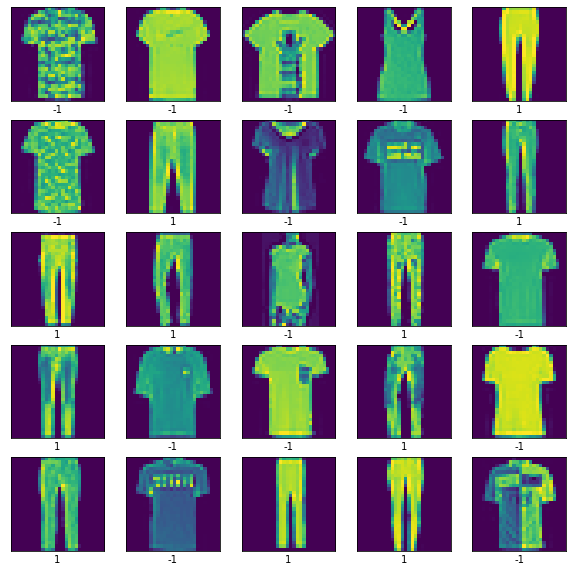

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_np[i,0])
plt.show()

In [62]:
# Take a small number of samples from the training dataset, say 500, and use the linear solver on them.
# Now our points are in a 28**2 dimensional space instead of the 2 dimensional plane.
size = 500
assert size<len(train_np)
u = np.zeros(28**2)
# S_x = np.array(dtype=np.float32)
S_x = train_np[0:size,1:28**2+1]
S_label = np.reshape(train_np[0:size,0],(size,1))
A = S_x * S_label
B = -A 
v = -np.ones(size)
w = linprog(u, A_ub=B, b_ub=v, bounds=tuple((None,None) for i in range(28**2)))
print(w)

     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([1.00931724, 1.00874051, 1.00910173, 1.00926937, 1.00892224,
       1.00910287, 1.00921215, 1.00905799, 1.00897702, 1.00838088,
       1.00963881, 1.0089378 , 1.00907419, 1.00947415, 1.00939319,
       1.00918208, 1.00914238, 1.00916019, 1.0090135 , 1.00895917,
       1.00919683, 1.00912028, 1.00843995, 1.00933681, 1.00916536,
       1.00901471, 1.00926837, 1.00923648, 1.00909679, 1.0092883 ,
       1.00917431, 1.00893088, 1.00895482, 1.00854469, 1.00913366,
       1.01050063, 1.00949021, 1.009315  , 1.00911591, 1.00920443,
       1.00907696, 1.00905152, 1.00928992, 1.00903837, 1.00885655,
       1.00837708, 1.009274  , 1.00875425, 1.00964215, 1.00946146,
       1.01019974, 1.00865303, 1.00912565, 1.00930089, 1.00904843,
       1.00911682, 1.00955311, 1.00914957, 1.00850998, 1.00895654,
       1.00915766, 1.00909532, 1.00938383, 1.00930514, 1.00880074,
       1

In [67]:
print(w.x.shape)
result = w.x.reshape(28,28)
print(result.shape)
# w.x [28,28]: floating - > [0,255]
res_img= np.interp(result,[np.min(result),np.max(result)],[0,255])


(784,)
(28, 28)


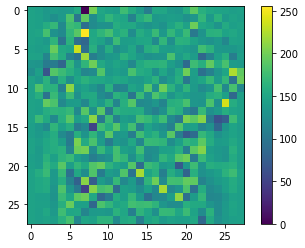

In [66]:
plt.imshow(res_img)
plt.colorbar()
plt.show()

In [58]:
# Compute the fraction of successes you have on the test set.
# That is, how often does the dot product of your solution with an entry in the test set yield a number
# with the same sign as its label?
successes = 0
for i in range(size):
    if np.dot(w.x,test_np[i,1:785])*test_np[i,0]>0:
        successes += 1
print(successes/size)

0.796


### Example 3: 

Let $\mathcal{H}$ be a class of functions over $\mathbb{R}$ defined by $\{x \mapsto \lceil{\sin(\theta x)}\rceil: \theta \in \mathbb{R}\}$. Please learn the samples drawn from the data set using the ERM rule.  

#### Questions:
1) Can you answer the same questions posed in Example 2? If yes, how does it explain the learning experiments and their accuracy? If not, could you guess from the experiments on the VC-dimension of $\mathcal{H}$?

*Hint: Use the hint in the textbook Chapter 8/Exercise 8. In particular, if $0.x_1x_2x_3 . . .$ is the binary expansion of $x \in (0,1)$, then for any natural number $m$, $\lceil\sin(2^m \pi x)\rceil = (1−x_m)$, provided
that there exist $k \geq m$ s.t. $x_k = 1$.*

In [ ]:
# Draw a sample from the data set:

# Design a function which convert a float to binary expansion with the first 1000 places:


# Rearrange the data with input x being a binary expansion and the output the label of 0 or 1:
S_x = np.array([[0,0,1,0,0,1],[0,0,0,0,1,0], [1,1,1,1,0,0]])
y = np.array([[0],[1],[0]])
#S = np.hstack((S_x,y))
size = 3
binarylen = 6

# Let y be the label corresponding to x. Find the indices m of the array x satisfying 1-x_m = y:
ind = np.zeros((size,binarylen))
for i in range(size):
    for j in range(binarylen):
        if 1-S_x[i,j] == y[i]:
            ind[i,j] = 1

# Find the smallest common index m such that 1-x_m = y for all (x,y) in the sample:
m = None
i = 0
j = 0
while j < binarylen and m == None:
    while i < size and ind[i,j] == 1:
        i += 1
    if i == size:
        m = j
    j += 1
    i = 0

print(ind)
print(m)